### 案例1 MNIST-手写数字识别系统
+ 算法思路
    > 准备训练参数

    > 准备数据集(训练集和测试集)

    > 建立神经网络模型

    > 选择优化算法, 计算 loss
    
    > 训练集上训练模型
    
    > 测试集上检验正确率

In [1]:
from PIL import Image
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms

In [2]:
# Hyper-parameters 
input_size = 784 
hidden_size = 500
num_classes = 10
num_epochs = 100
batch_size = 100
learning_rate = 0.001

In [3]:
# MNIST dataset (images and labels)

# train_dataset

train_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

# test_dataset
test_dataset = torchvision.datasets.MNIST(root='./data/',
                                         train=False,
                                         transform=transforms.ToTensor())

In [4]:
print(type(train_dataset))
print(type(test_dataset))

print('训练的图片数量:', len(train_dataset))
print('测试的图片数量:', len(test_dataset))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'torchvision.datasets.mnist.MNIST'>
训练的图片数量: 60000
测试的图片数量: 10000


In [5]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data/
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
# data loader (input pipeline)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,   # 导出图片数据集
                                           batch_size=batch_size,   # 训练选取多少张图片
                                           shuffle=True)            # 采取多少个子进程

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

tensor(0)


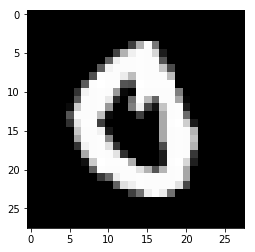

tensor(7)


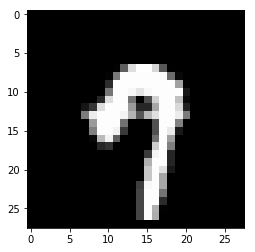

tensor(3)


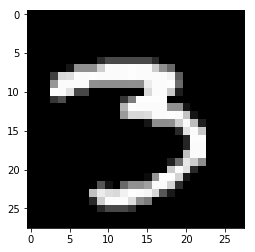

In [7]:
# 可视化训练集中的前五张图片.

indicator = 0
for image, label in train_loader:
    if indicator >=3:
        break
    print(label[0])
    img = transforms.ToPILImage()(image[0])
    img.show()
    # 显示图片
    
    plt.imshow(img)
    plt.show()
    
    indicator += 1

In [8]:
# 定义神经网络模型

class Net(nn.Module):
    def __init__(self, input_size, hidden_size,num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
        
    def forward(self, x):
        out1 = self.fc1(x)
        out2 = self.relu(out1)
        out = self.fc2(out2)
        return out
        

In [9]:
# 构建模型

mlp_model = Net(input_size, hidden_size, num_classes)

# 定义损失函数

ｃｒiterion = nn.CrossEntropyLoss()

# 定义迭代参数的算法

optimizer = torch.optim.Adam(mlp_model.parameters(), lr=learning_rate)



In [10]:
for epoch in range(num_epochs):
    for index, (image, labels) in enumerate(train_loader):
        
        # 从torch Tensor 类型转变为 Variable 
        image = Variable(image.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backword + Optimize
        
        optimizer.zero_grad()
        
        # 计算前向传播的值
        
        outputs = mlp_model(image)
        
        # 计算模型的损失函数
        
        loss = criterion(outputs, labels)
        
        # 计算向后传播梯度
        optimizer.step()
        
        if (index + 1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % (epoch + 1, num_epochs, index+1, len(train_dataset)//batch_size, loss.data[0]))

/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/100], Step [100/600], Loss: 2.3257
Epoch [1/100], Step [200/600], Loss: 2.2951
Epoch [1/100], Step [300/600], Loss: 2.2938
Epoch [1/100], Step [400/600], Loss: 2.3216
Epoch [1/100], Step [500/600], Loss: 2.3267
Epoch [1/100], Step [600/600], Loss: 2.3035
Epoch [2/100], Step [100/600], Loss: 2.2965
Epoch [2/100], Step [200/600], Loss: 2.3281
Epoch [2/100], Step [300/600], Loss: 2.3049
Epoch [2/100], Step [400/600], Loss: 2.3174
Epoch [2/100], Step [500/600], Loss: 2.3050
Epoch [2/100], Step [600/600], Loss: 2.3296
Epoch [3/100], Step [100/600], Loss: 2.3139
Epoch [3/100], Step [200/600], Loss: 2.3176
Epoch [3/100], Step [300/600], Loss: 2.3153
Epoch [3/100], Step [400/600], Loss: 2.3077
Epoch [3/100], Step [500/600], Loss: 2.3126
Epoch [3/100], Step [600/600], Loss: 2.3232
Epoch [4/100], Step [100/600], Loss: 2.3219
Epoch [4/100], Step [200/600], Loss: 2.3265
Epoch [4/100], Step [300/600], Loss: 2.3223
Epoch [4/100], Step [400/600], Loss: 2.3044
Epoch [4/100], Step [500/600], L

Epoch [31/100], Step [500/600], Loss: 2.3183
Epoch [31/100], Step [600/600], Loss: 2.3224
Epoch [32/100], Step [100/600], Loss: 2.3191
Epoch [32/100], Step [200/600], Loss: 2.3020
Epoch [32/100], Step [300/600], Loss: 2.2952
Epoch [32/100], Step [400/600], Loss: 2.3277
Epoch [32/100], Step [500/600], Loss: 2.3117
Epoch [32/100], Step [600/600], Loss: 2.3123
Epoch [33/100], Step [100/600], Loss: 2.3032
Epoch [33/100], Step [200/600], Loss: 2.3112
Epoch [33/100], Step [300/600], Loss: 2.3280
Epoch [33/100], Step [400/600], Loss: 2.3092
Epoch [33/100], Step [500/600], Loss: 2.3166
Epoch [33/100], Step [600/600], Loss: 2.3092
Epoch [34/100], Step [100/600], Loss: 2.3040
Epoch [34/100], Step [200/600], Loss: 2.2994
Epoch [34/100], Step [300/600], Loss: 2.3201
Epoch [34/100], Step [400/600], Loss: 2.3129
Epoch [34/100], Step [500/600], Loss: 2.3184
Epoch [34/100], Step [600/600], Loss: 2.3024
Epoch [35/100], Step [100/600], Loss: 2.3015
Epoch [35/100], Step [200/600], Loss: 2.3219
Epoch [35/

Epoch [62/100], Step [200/600], Loss: 2.2953
Epoch [62/100], Step [300/600], Loss: 2.2980
Epoch [62/100], Step [400/600], Loss: 2.3044
Epoch [62/100], Step [500/600], Loss: 2.2979
Epoch [62/100], Step [600/600], Loss: 2.3050
Epoch [63/100], Step [100/600], Loss: 2.3035
Epoch [63/100], Step [200/600], Loss: 2.2980
Epoch [63/100], Step [300/600], Loss: 2.3292
Epoch [63/100], Step [400/600], Loss: 2.3255
Epoch [63/100], Step [500/600], Loss: 2.3030
Epoch [63/100], Step [600/600], Loss: 2.3363
Epoch [64/100], Step [100/600], Loss: 2.3127
Epoch [64/100], Step [200/600], Loss: 2.3036
Epoch [64/100], Step [300/600], Loss: 2.2976
Epoch [64/100], Step [400/600], Loss: 2.3177
Epoch [64/100], Step [500/600], Loss: 2.3257
Epoch [64/100], Step [600/600], Loss: 2.2998
Epoch [65/100], Step [100/600], Loss: 2.3161
Epoch [65/100], Step [200/600], Loss: 2.2998
Epoch [65/100], Step [300/600], Loss: 2.2972
Epoch [65/100], Step [400/600], Loss: 2.3055
Epoch [65/100], Step [500/600], Loss: 2.3080
Epoch [65/

Epoch [92/100], Step [500/600], Loss: 2.2949
Epoch [92/100], Step [600/600], Loss: 2.3267
Epoch [93/100], Step [100/600], Loss: 2.3242
Epoch [93/100], Step [200/600], Loss: 2.3007
Epoch [93/100], Step [300/600], Loss: 2.2969
Epoch [93/100], Step [400/600], Loss: 2.3118
Epoch [93/100], Step [500/600], Loss: 2.3112
Epoch [93/100], Step [600/600], Loss: 2.3209
Epoch [94/100], Step [100/600], Loss: 2.3169
Epoch [94/100], Step [200/600], Loss: 2.3403
Epoch [94/100], Step [300/600], Loss: 2.3047
Epoch [94/100], Step [400/600], Loss: 2.3052
Epoch [94/100], Step [500/600], Loss: 2.3145
Epoch [94/100], Step [600/600], Loss: 2.3340
Epoch [95/100], Step [100/600], Loss: 2.3213
Epoch [95/100], Step [200/600], Loss: 2.3245
Epoch [95/100], Step [300/600], Loss: 2.3014
Epoch [95/100], Step [400/600], Loss: 2.2963
Epoch [95/100], Step [500/600], Loss: 2.3114
Epoch [95/100], Step [600/600], Loss: 2.3238
Epoch [96/100], Step [100/600], Loss: 2.3140
Epoch [96/100], Step [200/600], Loss: 2.3425
Epoch [96/

In [11]:
correct = 0 
total = 0
for images, labels in test_loader:
    images = Variable(image.view(-1, 28*28))
    outputs = mlp_model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the network on the 10000 test image: %d %%' %(100*correct/total))

Accuracy of the network on the 10000 test image: 10 %
